Jupyter notebook attached to quickly visualise code results

In [1]:
#first run these dependencies to allow cells below to run
import numpy as np
from matplotlib import pyplot as plt
import resource.pulseshape as pulse
import resource.operators as op

In [4]:
#define numerical parameters
b2 = 5 #in ps^2m^-1
nu = 300
stepsize = 5

t = np.linspace(-10,10,1024)
gaussPulseInitial = pulse.GaussianPulse(t,1)

Text(0.5, 0, '$T$')

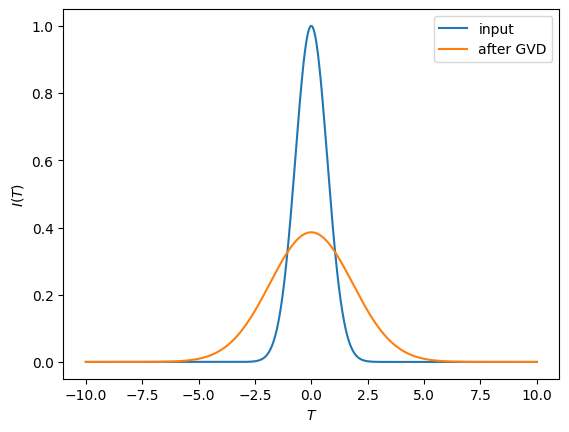

In [5]:
#apply gvd to test pulse 
gaussPulse = op.resolveGVD(b2,stepsize,gaussPulseInitial)
for i in range(1000):
    gaussPulse = op.resolveGVD(b2,stepsize,gaussPulse)

#plot results
plt.plot(t,np.square(gaussPulseInitial),label = "input")
plt.plot(t,np.square(np.abs(gaussPulse)),label = "after GVD")
plt.legend(loc="best")
plt.ylabel(r"$I(T)$")
plt.xlabel(r"$T$")